#**Project** **4**:
###Description: Build a logistic regression model to predict survival on the Titanic based on passenger features like age, sex, and class.


#Logistic Regression on the Titanic
###This graph visualizes the relationship between Titanic survival rates by sex and passenger class using logistic regression.

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
# Step 1 : Loading Titanic dataset
df = sns.load_dataset('titanic')

print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [ ]:
# Step 2 : Keeping only fields: survived, sex, age, pclass
data = df[['survived', 'sex', 'age', 'pclass']].dropna()
# convert sex to 0=male and 1=female
data['sex'] = data['sex'].map({'male': 0, 'female': 1})
# divide x and y, where x is features, y is prediciting who survived
X= data[['sex', 'age', 'pclass']]
y = data['survived']


In [ ]:
# Step 3 : train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Step 4 : getting accuracy, classification and confusion matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7482517482517482

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79        87
           1       0.67      0.70      0.68        56

    accuracy                           0.75       143
   macro avg       0.74      0.74      0.74       143
weighted avg       0.75      0.75      0.75       143


Confusion Matrix:
 [[68 19]
 [17 39]]


Predicted Survival: 1
Survival Probability: 0.80


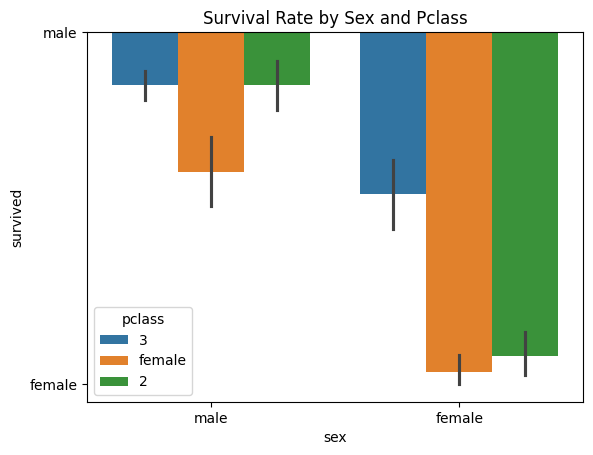

In [ ]:
# Step 5 : Predicting
# Example: Female, age 30, Pclass 2
sample = pd.DataFrame({'sex': [1], 'age': [30], 'pclass': [2]})
prediction = model.predict(sample)
probability = model.predict_proba(sample)[0][1]
print(f"Predicted Survival: {prediction[0]}")
print(f"Survival Probability: {probability:.2f}")
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x="sex", y="survived", hue="pclass", data=data.replace({0: 'male', 1: 'female'}))
plt.title("Survival Rate by Sex and Pclass")
plt.show()

#📊 Quick Insight
###Females had much higher survival rates than males.

Higher class (Pclass 1 & 2) passengers survived more than those in 3rd class.

Lowest survival: Males in 3rd class.

Highest survival: Females in 1st or 2nd class.

✅ Sex and class are strong predictors of survival on the Titanic.